In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import nltk
from collections import Counter
import string


## The date is a collection of wikipedia articles on medical subjects
- We are going to look a couple folders
- each folder has a collection of texts

In [2]:
organ = os.listdir("wikipedia_project/Organs_(anatomy)/")
rare = os.listdir("wikipedia_project/Rare_diseases/")
print(organ,rare)

['Ciliospinal_center.txt', 'Brain.txt', 'Serous_demilune.txt', 'Bulbourethral_gland.txt', 'Pharynx.txt', 'Parental_brain.txt', 'Spinal_cord.txt', 'Sex_organ.txt', 'Heart_nanotechnology.txt', 'Gastric_acid.txt', 'Cardiac_plexus.txt', 'Human_brain.txt', 'Sebaceous_gland.txt', 'Nucleus_reuniens.txt', 'Ceruminous_gland.txt', 'Human_leg.txt', 'Large_intestine.txt', 'Alveolar_gland.txt', 'Endocrine_system.txt', 'Thoracic_skeleton.txt', 'Sphincter_of_Oddi.txt', 'Gland.txt', 'Sensory_system.txt', 'Planum_temporale.txt', 'Nidopallium.txt', 'Consciousness_after_death.txt', 'Tubular_fluid.txt', 'Interactive_specialization.txt', 'Vallecula_of_cerebellum.txt', 'Human_musculoskeletal_system.txt', 'Cholecystocyte.txt', 'Brain_injury.txt', 'Venous_hum.txt', 'Liver.txt', 'Excerebration.txt', 'Lateral_ventricles.txt', 'Central_nervous_system.txt', 'Placenta.txt', 'Nervous_system.txt', 'Spleen.txt', 'Anterior_horn.txt', 'Preorbital_gland.txt', 'Gastroduodenal_artery.txt', 'Evolution_of_the_brain.txt', 'H

## Look at the one file in anatomy

In [4]:
fname = f"wikipedia_project/Organs_(anatomy)/{organ[0]}"
with open(fname) as f:
    text = f.readlines()
text[:10]

['The ciliospinal center (in Latin: centrum ciliospinale) is a structure which receives input from the pretectum, and has output to the superior cervical ganglion.\n',
 'It is located in the intermediolateral cell columns of the spinal cord between C8 and T2.\n',
 'It plays a role in the control of the iris dilator muscle. It is also known as "Budge\'s center", or "centre".\n',
 'It is associated with a reflex identified by Augustus Volney Waller and Ludwig Julius Budge in 1852.\n',
 '\n',
 '\n',
 '== See alsoEdit ==\n',
 "Horner's syndrome\n",
 '\n',
 '\n']

In [9]:
# get all the text files in organ and rare
organ_text = [open("wikipedia_project/Organs_(anatomy)/"+f).read() for f in organ if f.endswith('txt')]
rare_text = [open("wikipedia_project/Rare_diseases/"+f).read() for f in rare if f.endswith('txt')]

In [3]:
nltk.download('stopwords') # you need download the stopwords before referencing
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dami.osoba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# take a look at the stop words
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Unfortunately the nltk stopword list isn't comprehsive enough.
- I am augmenting with a list from sklearn

In [5]:
#combine stopwords
stopwords_ = ['next', 'within', 'yet', 'might', 'found', 'please', 'hereupon', 'most', 'either',
              'done', 'eg', 'forty', 'co', 'former', 'hereby', 'beyond', 'four', 'being', 'herself',
              'besides', 'thin', 'thru', 'become', 'fire', 'another', 'front', 'wherein', 'herein', 'of', 
              'which', 're', 'those', 'here', 'top', 'take', 'on', 'me', 'among', 'after', 'same', 'ten',
              'mill', 'whom', 'no', 'part', 'thence', 'not', 'see', 'give', 'seems', 'cry', 'cannot', 'be', 
              'because', 'also', 'are', 'yourselves', 'our', 'detail', 'seem', 'wherever', 'each', 'a', 'some',
              'were', 'un', 'empty', 'across', 'namely','a', 'move', 'without', 'bill', 'could', 'sixty', 'anyone', 
              'in', 'otherwise', 'third', 'ours', 'since', 'out', 'back', 'serious', 'thick', 'itself', 'would', 
              'often', 'mine', 'however', 'between', 'must', 'latter', 'how', 'their', 'made', 'all', 'nine', 
              'onto', 'or', 'indeed', 'together', 'whenever', 'had', 'towards', 'yourself', 'more', 'what', 
              'afterwards', 'its', 'fifteen', 'so', 'via', 'sometimes', 'became', 'nevertheless', 'that', 'off',
              'latterly', 'as', 'last', 'hereafter', 'thereupon', 'every', 'many', 'myself', 'during', 
              'everywhere', 'almost', 'yours', 'too', 'is', 'few', 'de', 'still', 'sometime', 'once', 'two',
              'whole', 'others', 'very', 'him', 'except', 'for', 'toward', 'through', 'perhaps', 'describe', 
              'from', 'con', 'below', 'again', 'behind', 'something', 'against', 'there', 'thereby', 'throughout', 
              'upon', 'never', 'well', 'into', 'five', 'already', 'whatever', 'was', 'someone', 'show', 'only',
              'noone', 'cant', 'neither', 'has', 'other', 'thus', 'whereupon', 'twelve', 'do', 'less', 'any', 
              'therefore', 'least', 'if', 'where', 'keep', 'such', 'rather', 'hers', 'his', 'you', 'when', 'becoming',
              'inc', 'bottom', 'them', 'while', 'one', 'full', 'etc', 'elsewhere', 'due', 'the', 'have', 'although',
              'an', 'whence', 'should', 'nor', 'than', 'they', 'alone', 'will', 'whether', 'whereas', 'even', 'first',
              'own', 'eleven', 'amount', 'and', 'anything', 'by', 'ltd', 'mostly', 'about', 'hence', 'these', 'with', 'ever','both', 
              'enough', 'call', 'whereby', 'much', 'themselves', 'three', 'why', 'per', 'anywhere', 'side', 'whither', 'i',
              'eight', 'may', 'else', 'amongst', 'nowhere', 'who', 'ie', 'always', 'under', 'several', 'sincere', 'anyway', 
              'name', 'interest', 'but', 'beforehand', 'fifty', 'get', 'somehow', 'now', 'nothing', 'it', 'fill', 'couldnt', 
              'at', 'everyone', 'ourselves', 'anyhow', 'further', 'your', 'meanwhile', 'then', 'go', 'though', 'six', 'us', 
              'therein', 'seemed', 'around', 'hundred', 'seeming', 'amoungst', 'beside', 'find', 'nobody', 'himself', 'we',
              'been', 'whoever', 'up', 'hasnt', 'whereafter', 'he', 'she', 'until', 'everything', 'moreover', 'over', 'somewhere', 
              'above', 'along', 'before', 'twenty', 'formerly', 'becomes', 'to', 'her', 'none', 'whose', 'down', 'put', 'system',
              'this', 'can', 'thereafter', 'am', 'my','within','also','into']

combined_stop = list(set(stopwords_ +stopwords.words('english')))

## Let's look at the most common words in the these two folders
- concancenate the individual text files into one giant string
- change to lower case
- remove punctuation marks
- split giant string into a list
- remove stopwords

In [7]:

def process_text(text):
    giant_text = "".join([word.lower() for word in text])
    text_no_punctuation = giant_text.translate(str.maketrans('', '', string.punctuation))
    word_list = [a for a in text_no_punctuation.split() if a not in combined_stop]
    return word_list

In [10]:
organ_tx = process_text(organ_text)
rare_tx = process_text(rare_text)

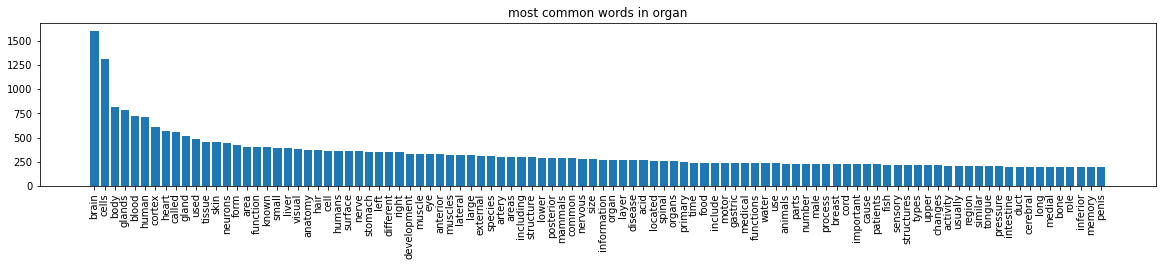

In [11]:
mscm = Counter(organ_tx).most_common(100)
top_count = [a[1] for a in mscm]
top_words = [a[0] for a in mscm]
plt.figure(figsize=(20, 3))
plt.bar(top_words,top_count)
plt.xticks(rotation=90)
plt.title("most common words in organ")
plt.show()


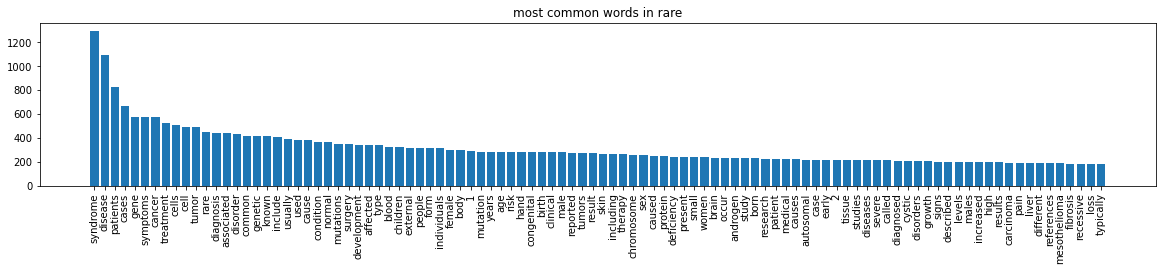

In [14]:
mscm = Counter(rare_tx).most_common(100)
top_count = [a[1] for a in mscm]
top_words = [a[0] for a in mscm]
plt.figure(figsize=(20, 3))
plt.bar(top_words,top_count)
plt.xticks(rotation=90)
plt.title("most common words in rare")
plt.show()

## Now let's try a classification task
- classify each text to the correct folder
- first we combine the data for organ and rare together
- create a list for labels
- use numpy arrays for easy indexing


In [12]:
combined = np.asarray(organ_text + rare_text)
labels =  np.asarray(['organ' for i in range(len(organ_text))] + ['rare' for i in range(len(rare_text))])
print(len(labels))

654


In [13]:
labels

array(['organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'organ', 'organ', 'organ', 'organ', 'organ', 'organ',
       'organ', 'org

## Notice that all the organs are the top and while rare is at the bottom
- It is preferable to shuffle the data

In [14]:
index = np.arange(654)
np.random.shuffle(index)

In [33]:
labels[index]

array(['rare', 'organ', 'rare', 'rare', 'rare', 'organ', 'organ', 'rare',
       'organ', 'organ', 'rare', 'rare', 'rare', 'organ', 'rare', 'rare',
       'rare', 'rare', 'rare', 'rare', 'rare', 'rare', 'rare', 'rare',
       'rare', 'rare', 'organ', 'organ', 'rare', 'rare', 'rare', 'organ',
       'organ', 'rare', 'organ', 'rare', 'rare', 'rare', 'organ', 'organ',
       'organ', 'rare', 'organ', 'organ', 'rare', 'organ', 'rare',
       'organ', 'organ', 'organ', 'organ', 'rare', 'rare', 'rare',
       'organ', 'rare', 'rare', 'organ', 'organ', 'organ', 'organ',
       'rare', 'organ', 'rare', 'organ', 'rare', 'rare', 'organ', 'rare',
       'rare', 'organ', 'rare', 'organ', 'rare', 'organ', 'organ',
       'organ', 'organ', 'organ', 'rare', 'rare', 'rare', 'rare', 'rare',
       'rare', 'rare', 'organ', 'rare', 'organ', 'organ', 'rare', 'rare',
       'organ', 'organ', 'organ', 'rare', 'organ', 'organ', 'organ',
       'organ', 'organ', 'rare', 'organ', 'rare', 'rare', 'organ',
     

In [15]:
# we can use lists as an index for numpy array
shuffled_labels = labels[index]
shuffled_data = combined[index]

In [21]:
len(shuffled_data)

654

In [23]:
shuffled_data[1]

'In human neuroanatomy, brain asymmetry can refer to at least two quite distinct findings:\nNeuroanatomical differences between the left and right sides of the brain\nLateralized functional differences: lateralization of brain function\nNeuroanatomical differences themselves exist on different scales, from neuronal densities, to the size of regions such as the planum temporale, toat the largest scalethe torsion or "wind" in the human brain, reflected shape of the skull, which reflects a backward (posterior) protrusion of the left occipital bone and a forward (anterior) protrusion of the right frontal bone. In addition to gross size differences, both neurochemical and structural differences have been found between the hemispheres. Asymmetries appear in the spacing of cortical columns, as well as dendritic structure and complexity. Larger cell sizes are also found in layer III of Broca\'s area.\nThe human brain has an overall leftward posterior and rightward anterior asymmetry (or brain 

## We have tokenize the each text and get counts for each word.
- more about the countvectorizer
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [24]:
# stop words to english
vectorizer = CountVectorizer(stop_words = "english")
analyze = vectorizer.build_analyzer()
print(vectorizer.get_stop_words())  # copied this list for the combined stopwords earlier


frozenset({'everything', 'from', 'twenty', 'many', 'thru', 'whoever', 'here', 'was', 'those', 'another', 'above', 'could', 'if', 'system', 'besides', 'nowhere', 'nevertheless', 'thereupon', 'already', 'therein', 'four', 'whether', 'him', 'you', 'de', 'amongst', 'ltd', 'so', 'may', 'our', 'among', 'how', 'cannot', 'each', 'and', 'last', 'becomes', 'a', 'though', 'under', 'name', 'after', 'every', 'of', 'too', 'between', 'two', 'their', 'no', 'nothing', 'or', 'seemed', 'call', 'well', 'alone', 'whom', 'when', 'off', 'further', 'do', 're', 'below', 'less', 'go', 'be', 'myself', 'up', 'anyone', 'throughout', 'else', 'against', 'had', 'fifteen', 'in', 'are', 'next', 'this', 'hasnt', 'see', 'whence', 'out', 'whereafter', 'yours', 'through', 'please', 'yourself', 'along', 'whereas', 'for', 'everyone', 'never', 'otherwise', 'being', 'since', 'he', 'whereby', 'such', 'made', 'have', 'move', 'someone', 'my', 'has', 'several', 'what', 'without', 'mill', 'often', 'six', 'there', 'more', 'most', 'w

In [25]:
# use top 10 words to build word count matrix
vectorizer = CountVectorizer(max_features=10, stop_words="english")
count_matrix = vectorizer.fit_transform(shuffled_data)
count_matrix


<654x10 sparse matrix of type '<class 'numpy.int64'>'
	with 2317 stored elements in Compressed Sparse Row format>

## The count matrix is sparse matrix
- rows correspond to each text
- columns correspond to each top word
- sparse matrix is a representation where only the index for nonzero entries are stored.

In [27]:
count_matrix.shape

(654, 10)

In [26]:
print(count_matrix) # get all the non zero entries

  (0, 2)	25
  (0, 3)	3
  (0, 1)	1
  (0, 4)	1
  (0, 5)	2
  (0, 8)	1
  (1, 2)	11
  (1, 3)	1
  (1, 6)	4
  (2, 2)	1
  (2, 1)	2
  (2, 5)	3
  (2, 8)	13
  (2, 0)	1
  (2, 7)	3
  (2, 9)	3
  (3, 8)	2
  (4, 4)	1
  (4, 5)	2
  (4, 8)	1
  (5, 5)	5
  (5, 7)	4
  (7, 3)	1
  (7, 4)	4
  (8, 2)	2
  :	:
  (648, 8)	9
  (649, 4)	1
  (649, 6)	1
  (649, 9)	24
  (650, 2)	4
  (650, 3)	1
  (650, 4)	3
  (650, 5)	3
  (650, 8)	2
  (650, 6)	2
  (650, 7)	1
  (650, 9)	3
  (651, 3)	1
  (651, 1)	2
  (651, 4)	8
  (651, 6)	1
  (652, 2)	1
  (652, 3)	1
  (652, 1)	1
  (652, 8)	5
  (652, 6)	4
  (652, 7)	16
  (653, 3)	11
  (653, 4)	3
  (653, 9)	1


In [28]:
# top 10 words used for the counts
vectorizer.get_feature_names()

['blood',
 'body',
 'brain',
 'cell',
 'cells',
 'disease',
 'human',
 'patients',
 'syndrome',
 'used']

## Tfidf weighting
- Downweight words by how often they appear in each text.
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [29]:
# get tfidf 
tfidf = TfidfTransformer()
tfidf_mat = tfidf.fit_transform(count_matrix)
print(tfidf_mat)

  (0, 8)	0.03883302678178968
  (0, 5)	0.07064915009032431
  (0, 4)	0.03360034804814541
  (0, 3)	0.11597308715839595
  (0, 2)	0.9888015833176947
  (0, 1)	0.034545363175023984
  (1, 6)	0.30951286011953
  (1, 3)	0.08415873221586266
  (1, 2)	0.947163711938146
  (2, 9)	0.18612721855951425
  (2, 8)	0.9266876237715737
  (2, 7)	0.20637942920700025
  (2, 5)	0.1945301712060245
  (2, 2)	0.07260355943726966
  (2, 1)	0.126826067578923
  (2, 0)	0.06939828448993547
  (3, 8)	1.0
  (4, 8)	0.4446186251822413
  (4, 5)	0.8088972348193083
  (4, 4)	0.3847070855114713
  (5, 7)	0.6470860022403537
  (5, 5)	0.7624170156184847
  (7, 4)	0.9610364562016033
  (7, 3)	0.2764216522840857
  (8, 9)	0.15005935832152217
  :	:
  (648, 2)	0.3214828619282518
  (649, 9)	0.9981870721818263
  (649, 6)	0.04373773820256458
  (649, 4)	0.04134705776711848
  (650, 9)	0.3813757096207138
  (650, 8)	0.29212124815885376
  (650, 7)	0.14095753408892323
  (650, 6)	0.2673729028807876
  (650, 5)	0.39859340649102626
  (650, 4)	0.3791376731545

In [58]:
# Create the training dataset
X = tfidf_mat
y = shuffled_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [59]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [62]:
confusion_matrix(y_test, clf.predict(X_test),labels=['organ','rare'])


array([[84,  5],
       [25, 50]])

## Looks like the model is having a hard time classifying the rare documents
- we can make the decision tree more complex
- use more features by using more words.

In [36]:
from sklearn.model_selection import cross_val_score

In [55]:
def create_score(max_dep=3,max_feats=10,n_ests = 10):
    vectorizer = CountVectorizer(max_features=max_feats, stop_words="english")
    count_matrix = vectorizer.fit_transform(shuffled_data)

    tfidf = TfidfTransformer()
    tfidf_mat = tfidf.fit_transform(count_matrix)


    X = tfidf_mat
    y = shuffled_labels

    clf = RandomForestClassifier(max_depth = max_dep,n_estimators =n_ests )
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    return scores.mean()


In [57]:
create_score(max_dep=5,max_feats=20)

0.8547400611620795

In [46]:
scores = [create_score(max_dep=i) for i in range(2,6)]

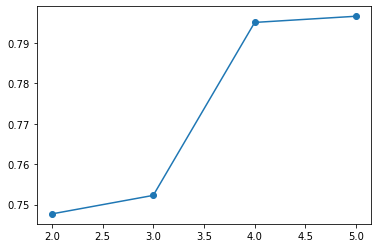

In [52]:
max_depth_list = range(2,6)
plt.plot(max_depth_list,scores,marker='o')

In [47]:
scores

[0.7477064220183487,
 0.7522935779816514,
 0.7951070336391437,
 0.7966360856269113]